In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import copy
import statsmodels.stats.api as sms
from scipy.stats import wilcoxon
sns.set(style="darkgrid")
import test_mod as mod
from scipy.stats import chi2_contingency

# Descriptive analysis of attributes
## Importing data

In [2]:
df = pd.read_csv(r"C:\Users\gdbt0\OneDrive\GitHub\Projects\cancer research\data\processed\research_variables.csv")
df.head()

,id,tumour_stage,diagnos_tumor_size,after EBRT_tumor_size,before_brachy_categor,post_treatment_response
0,101,2B,≤4см,Арилсан,1,0
1,102,2B,≤4см,≤2см,1,0
2,103,3B,>4см,>2см,2,2
3,104,2B,>4см,>2см,2,0
4,105,3B,>4см,≤2см,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       120 non-null    int64 
 1   tumour_stage             120 non-null    object
 2   diagnos_tumor_size       120 non-null    object
 3   after EBRT_tumor_size    120 non-null    object
 4   before_brachy_categor    120 non-null    int64 
 5   post_treatment_response  120 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 5.8+ KB


## After EBRT tumor size by Diagnostic tumor size

In [4]:
#Transforming data
primary_var_name = 'diagnos_tumor_size'
secondary_var_name = 'after EBRT_tumor_size'

primary_vs_secondary = df[[primary_var_name,secondary_var_name]].copy()
primary_vs_secondary.dropna(inplace=True)
primary_vs_secondary[primary_var_name] = primary_vs_secondary[primary_var_name].astype('category')

###  Diagnostic tumor size

In [5]:
# Declaration of the variable 
primary_var = df[primary_var_name].copy()
primary_var.dropna(inplace=True)
primary_var_value_counts = primary_var.value_counts()

In [6]:
## Finding the frequency distribution of categories in the variable
print("The frequency distribution of categories  in {}.".format(primary_var_name))
print("In total, there are {} categories.".format(primary_var.value_counts().count()))
primary_var.value_counts()

The frequency distribution of categories  in diagnos_tumor_size.
In total, there are 2 categories.


>4см    63
≤4см    57
Name: diagnos_tumor_size, dtype: int64

C:\Users\gdbt0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


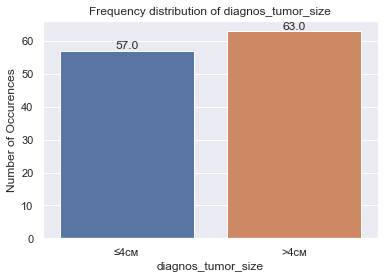

In [7]:
# Barplot
plot = sns.countplot(primary_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format(primary_var_name))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format(primary_var_name),fontsize=12)
plt.show()

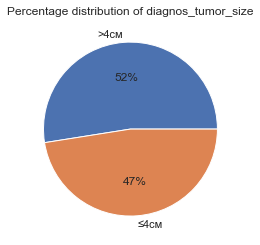

In [8]:
#Making a pie chart
plt.title("Percentage distribution of {}".format(primary_var_name))
plt.pie(primary_var_value_counts, labels=primary_var_value_counts.index, autopct='%.0f%%')
plt.show()

### After EBRT tumor size

In [9]:
# Declaration of the variable 
secondary_var = df[secondary_var_name].copy()
secondary_var.dropna(inplace=True)
secondary_var_value_counts = secondary_var.value_counts()

In [10]:
## Finding the frequency distribution of categories in the variable
print("The frequency distribution of categories  in {}.".format(secondary_var_name))
print("In total, there are {} categories.".format(secondary_var.value_counts().count()))
secondary_var.value_counts()

The frequency distribution of categories  in after EBRT_tumor_size.
In total, there are 3 categories.


>2см       51
≤2см       47
Арилсан    22
Name: after EBRT_tumor_size, dtype: int64

C:\Users\gdbt0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


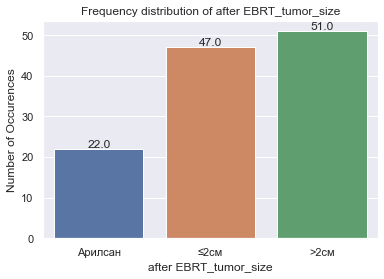

In [11]:
# Barplot
plot = sns.countplot(secondary_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format(secondary_var_name))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format(secondary_var_name),fontsize=12)
plt.show()

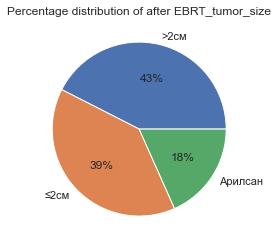

In [12]:
#Pie chart
plt.title("Percentage distribution of {}".format(secondary_var_name))
plt.pie(secondary_var_value_counts, labels=secondary_var_value_counts.index, autopct='%.0f%%')
plt.show()

### Analysis of groups
Creates groups by diagnos_tumor_size

In [13]:
below_four = primary_vs_secondary[primary_vs_secondary[primary_var_name] == "≤4см"][secondary_var_name]
above_four = primary_vs_secondary[primary_vs_secondary[primary_var_name] == ">4см"][secondary_var_name]

### below_four
The group where the values of diagnos_tumor_size are below or equal 4cm.

In [14]:
## Finding the frequency distribution of categories in the variable
print("The frequency distribution of categories in the group below_four.")
print("In total, there are {} categories.".format(below_four.value_counts().count()))
below_four.value_counts()

The frequency distribution of categories in the group below_four.
In total, there are 3 categories.


≤2см       33
Арилсан    15
>2см        9
Name: after EBRT_tumor_size, dtype: int64

C:\Users\gdbt0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


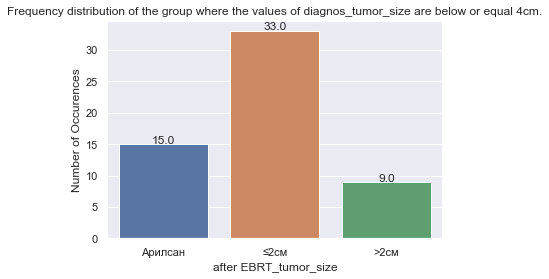

In [15]:
# Barplot
plot = sns.countplot(below_four)
mod.show_values(plot)
plt.title("Frequency distribution of the group where the values of diagnos_tumor_size are below or equal 4cm.")
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format(secondary_var_name),fontsize=12)
plt.show()

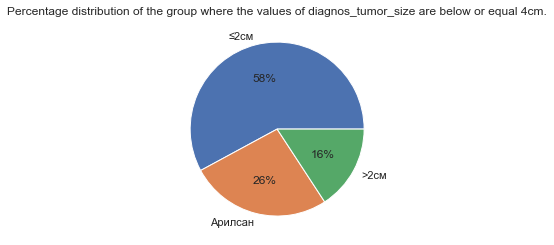

In [16]:
#Pie chart
plt.title("Percentage distribution of the group where the values of diagnos_tumor_size are below or equal 4cm.")
plt.pie(below_four.value_counts(), labels=below_four.value_counts().index, autopct='%.0f%%')
plt.show()

### above_four
The group where the values of diagnos_tumor_size are above 4cm.

In [17]:
## Finding the frequency distribution of categories in the variable
print("The frequency distribution of categories in the group above_four.")
print("In total, there are {} categories.".format(above_four.value_counts().count()))
above_four.value_counts()

The frequency distribution of categories in the group above_four.
In total, there are 3 categories.


>2см       42
≤2см       14
Арилсан     7
Name: after EBRT_tumor_size, dtype: int64

C:\Users\gdbt0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


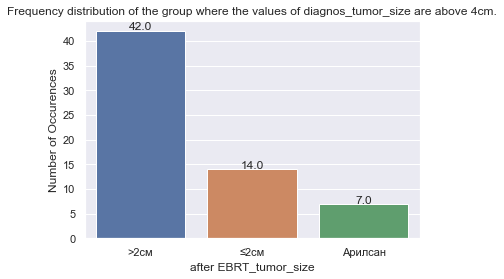

In [18]:
# Barplot
plot = sns.countplot(above_four)
mod.show_values(plot)
plt.title("Frequency distribution of the group where the values of diagnos_tumor_size are above 4cm.")
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format(secondary_var_name),fontsize=12)
plt.show()

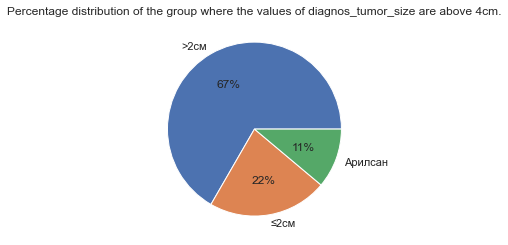

In [19]:
#Pie chart
plt.title("Percentage distribution of the group where the values of diagnos_tumor_size are above 4cm.")
plt.pie(above_four.value_counts(), labels=above_four.value_counts().index, autopct='%.0f%%')
plt.show()

### Chi square test for Independence

Test that the categorical values of the two groups are different to each other. 

Reference

[1] Chi-Bar-Squared. Retrieved March 9, 2022 from:

[2] Johns Hopkins.

[3] Kenney, J. F. and Keeping, E. S. Mathematics of Statistics, Pt. 2, 2nd ed. Princeton, NJ: Van Nostrand, 1951.

[4] https://www.statisticshowto.com/probability-and-statistics/chi-square/

[5] https://www.askpython.com/python/examples/chi-square-test

### Uses the pandas crosstab() function to create a contingency table of the two selected variables

In [20]:
chisqt = pd.crosstab(primary_var, secondary_var, margins=True)
print(chisqt)

after EBRT_tumor_size  >2см  Арилсан  ≤2см  All
diagnos_tumor_size                             
>4см                     42        7    14   63
≤4см                      9       15    33   57
All                      51       22    47  120


In [21]:
value = np.array([chisqt.iloc[0][0:4].values, chisqt.iloc[1][0:4].values])
print(value)

[[42  7 14 63]
 [ 9 15 33 57]]


In [22]:
chi_stat = chi2_contingency(value)[0]
p_value = chi2_contingency(value)[1]
degrees_of_freedom = chi2_contingency(value)[2]
significance_level = 0.05

#### The null hypothesis: 
The grouping variables have no association or correlation amongst them.
#### The alternate hypothesis
The variables are associated with each other and happen to have a correlation between the variables.

In [23]:
print("The p-value of the test is: {}".format(p_value) + "\nThe test statistic is: {}".format(chi_stat) + "\nThe degrees of freedom is: {}".format(degrees_of_freedom) 
    )

The p-value of the test is: 5.988677882319218e-07
The test statistic is: 31.72218862094365
The degrees of freedom is: 3


In [25]:
if p_value <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('Accept NULL HYPOTHESIS')

Reject NULL HYPOTHESIS
